In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import f_oneway
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.manifold import TSNE

Quantity_per_Chrono = pd.read_excel('python_2_All_Pottery_Totals_per_Chrono_Qty.xlsx')
Weight_per_Chrono = pd.read_excel('python_3_All_Pottery_Totals_per_Chrono_Wt.xlsx')
Fine_quantity = pd.read_excel('2a_Fine_Pottery_Totals_per_Chrono_Qty.xlsx')
Medium_quantity = pd.read_excel('2b_MedCoarse_Pottery_Totals_per_Chrono_Qty.xlsx')
Coarse_quantity = pd.read_excel('2c_Coarse_Pottery_Totals_per_Chrono_Qty.xlsx')
Fine_weight = pd.read_excel('3a_Fine_Pottery_Totals_per_Chrono_Wt.xlsx')
Medium_weight = pd.read_excel('3b_MedCoarse_Pottery_Totals_per_Chrono_Wt.xlsx')
Coarse_weight = pd.read_excel('3c_Coarse_Pottery_Totals_per_Chrono_Wt.xlsx')

time_period_columns = ['05_Neo', '25_EBA', '35_MBA', '45_LBA', '55_PG']



def classify_region(grsu):
    x = grsu[:2]
    y = int(grsu[2:5])
    if grsu in ['LR797-001', 'LR797-002', 'LR797-003', 'LR797-004', 'LR796-004', 'LS797-001']:
        return 'Grave'
    elif x >= 'LL' and x <= 'LQ' and y >= 782 and y <= 787:
        return 'Settlement'


for df in [Quantity_per_Chrono, Weight_per_Chrono, Fine_quantity, Fine_weight, Medium_quantity, Medium_weight, Coarse_quantity, Coarse_weight]:
    df['Region'] = df['GRSU'].apply(classify_region)


#quantity
grave_df_q = Quantity_per_Chrono[Quantity_per_Chrono['Region'] == 'Grave'].copy()
settlement_df_q = Quantity_per_Chrono[Quantity_per_Chrono['Region'] == 'Settlement'].copy()

#weight
grave_df_w = Quantity_per_Chrono[Quantity_per_Chrono['Region'] == 'Grave'].copy()
settlement_df_w = Quantity_per_Chrono[Quantity_per_Chrono['Region'] == 'Settlement'].copy()


#extract relevant time period columns
Quantity_per_Chrono_grave = grave_df_q[time_period_columns]
Quantity_per_Chrono_settlement = settlement_df_q[time_period_columns]
Weight_per_Chrono_grave = grave_df_w[time_period_columns]
Weight_per_Chrono_settlement = settlement_df_w[time_period_columns]


#normalize data
scaler = StandardScaler()
data_scaled_q_grave = scaler.fit_transform(Quantity_per_Chrono_grave)
data_scaled_q_settlement = scaler.fit_transform(Quantity_per_Chrono_settlement)
data_scaled_w_grave = scaler.fit_transform(Weight_per_Chrono_grave)
data_scaled_w_settlement = scaler.fit_transform(Weight_per_Chrono_settlement)


#combine data
combined_data_gsq = pd.concat([Quantity_per_Chrono_grave, Quantity_per_Chrono_settlement])
combined_data_gsw = pd.concat([Weight_per_Chrono_grave, Weight_per_Chrono_settlement])


In [20]:
combined_data_gsq

,05_Neo,25_EBA,35_MBA,45_LBA,55_PG
1048,0,1,2,0,0
1049,0,1,3,5,0
1050,0,2,6,2,0
1051,0,3,2,1,1
1052,0,3,3,0,0
...,...,...,...,...,...
904,0,1,1,13,0
905,0,0,6,7,1
906,0,4,4,13,0
907,0,1,3,10,0


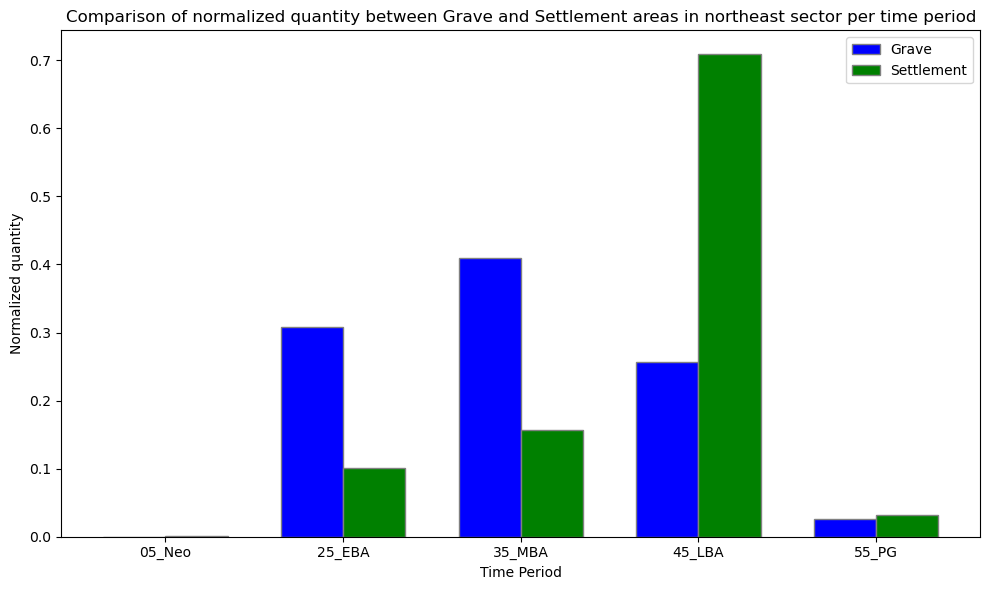

In [25]:
sum_grave = combined_data_gsq[combined_data_gsq.index.isin(Quantity_per_Chrono_grave.index)].sum(axis=0)
sum_settlement = combined_data_gsq[combined_data_gsq.index.isin(Quantity_per_Chrono_settlement.index)].sum(axis=0)

total_grave = sum_grave.sum()
total_settlement = sum_settlement.sum()

norm_grave = sum_grave / total_grave
norm_settlement = sum_settlement / total_settlement



bar_width = 0.35
r1 = range(len(time_period_columns))
r2 = [x + bar_width for x in r1]


plt.figure(figsize=(10, 6))
plt.bar(r1, norm_grave, color='blue', width=bar_width, edgecolor='grey', label='Grave')
plt.bar(r2, norm_settlement, color='green', width=bar_width, edgecolor='grey', label='Settlement')
plt.xlabel('Time Period')
plt.ylabel('Normalized quantity')
plt.xticks([r + bar_width / 2 for r in r1], time_period_columns)
plt.title('Comparison of normalized quantity between Grave and Settlement areas in northeast sector per time period')
plt.legend()

plt.tight_layout()
plt.show()


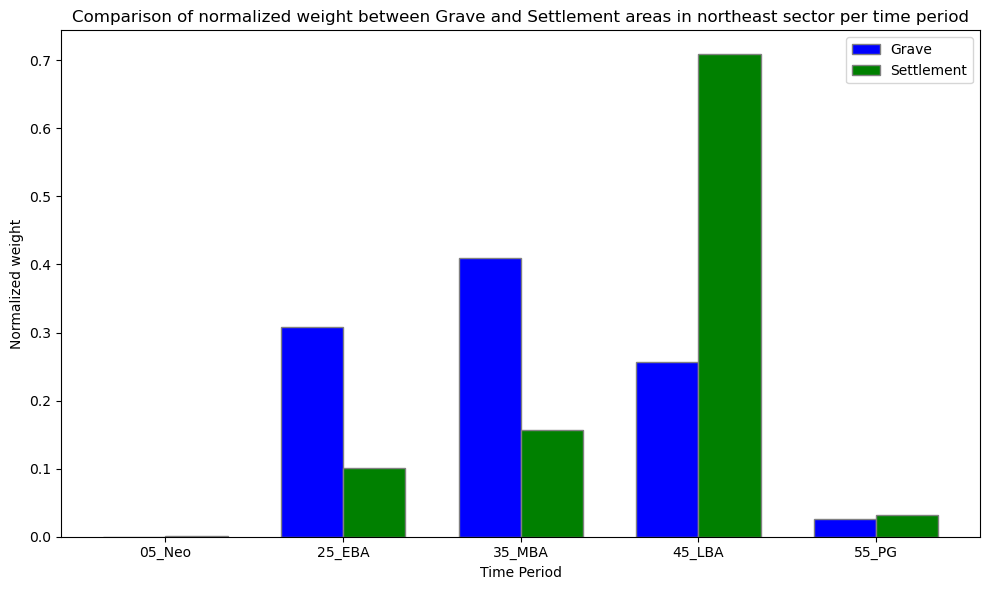

In [26]:
sum_grave = combined_data_gsw[combined_data_gsw.index.isin(Weight_per_Chrono_grave.index)].sum(axis=0)
sum_settlement = combined_data_gsw[combined_data_gsw.index.isin(Weight_per_Chrono_settlement.index)].sum(axis=0)

total_grave = sum_grave.sum()
total_settlement = sum_settlement.sum()

norm_grave = sum_grave / total_grave
norm_settlement = sum_settlement / total_settlement



bar_width = 0.35
r1 = range(len(time_period_columns))
r2 = [x + bar_width for x in r1]


plt.figure(figsize=(10, 6))
plt.bar(r1, norm_grave, color='blue', width=bar_width, edgecolor='grey', label='Grave')
plt.bar(r2, norm_settlement, color='green', width=bar_width, edgecolor='grey', label='Settlement')
plt.xlabel('Time Period')
plt.ylabel('Normalized weight')
plt.xticks([r + bar_width / 2 for r in r1], time_period_columns)
plt.title('Comparison of normalized weight between Grave and Settlement areas in northeast sector per time period')
plt.legend()

plt.tight_layout()
plt.show()


In [45]:
grave_fine_q = Fine_quantity[Fine_quantity['Region'] == 'Grave'].copy()
settlement_fine_q = Fine_quantity[Fine_quantity['Region'] == 'Settlement'].copy()
grave_medium_q = Medium_quantity[Medium_quantity['Region'] == 'Grave'].copy()
settlement_medium_q = Medium_quantity[Medium_quantity['Region'] == 'Settlement'].copy()
grave_coarse_q = Coarse_quantity[Coarse_quantity['Region'] == 'Grave'].copy()
settlement_coarse_q = Coarse_quantity[Coarse_quantity['Region'] == 'Settlement'].copy()

Quantity_per_Chrono_grave_fine = grave_fine_q[time_period_columns]
Quantity_per_Chrono_grave_medium = grave_medium_q[time_period_columns]
Quantity_per_Chrono_grave_coarse = grave_coarse_q[time_period_columns]

Quantity_per_Chrono_settlement_fine = settlement_fine_q[time_period_columns]
Quantity_per_Chrono_settlement_medium = settlement_medium_q[time_period_columns]
Quantity_per_Chrono_settlement_coarse = settlement_coarse_q[time_period_columns]

combined_data_gsq_fine = pd.concat([Quantity_per_Chrono_grave_fine, Quantity_per_Chrono_settlement_fine])
combined_data_gsq_medium = pd.concat([Quantity_per_Chrono_grave_medium, Quantity_per_Chrono_settlement_medium])
combined_data_gsq_coarse = pd.concat([Quantity_per_Chrono_grave_coarse, Quantity_per_Chrono_settlement_coarse])


grave_fine_w = Fine_weight[Fine_weight['Region'] == 'Grave'].copy()
settlement_fine_w = Fine_weight[Fine_weight['Region'] == 'Settlement'].copy()

grave_medium_w = Medium_weight[Medium_weight['Region'] == 'Grave'].copy()
settlement_medium_w = Medium_weight[Medium_weight['Region'] == 'Settlement'].copy()

grave_coarse_w = Coarse_weight[Coarse_weight['Region'] == 'Grave'].copy()
settlement_coarse_w = Coarse_weight[Coarse_weight['Region'] == 'Settlement'].copy()


Weight_per_Chrono_grave_fine_w = grave_fine_w[time_period_columns]
Weight_per_Chrono_grave_medium_w = grave_medium_w[time_period_columns]
Weight_per_Chrono_grave_coarse_w = grave_coarse_w[time_period_columns]

Weight_per_Chrono_settlement_fine_w = settlement_fine_w[time_period_columns]
Weight_per_Chrono_settlement_medium_w = settlement_medium_w[time_period_columns]
Weight_per_Chrono_settlement_coarse_w = settlement_coarse_w[time_period_columns]


combined_data_gsq_fine_w = pd.concat([Weight_per_Chrono_grave_fine_w, Weight_per_Chrono_settlement_fine_w])
combined_data_gsq_medium_w = pd.concat([Weight_per_Chrono_grave_medium_w, Weight_per_Chrono_settlement_medium_w])
combined_data_gsq_coarse_w = pd.concat([Weight_per_Chrono_grave_coarse_w, Weight_per_Chrono_settlement_coarse_w])



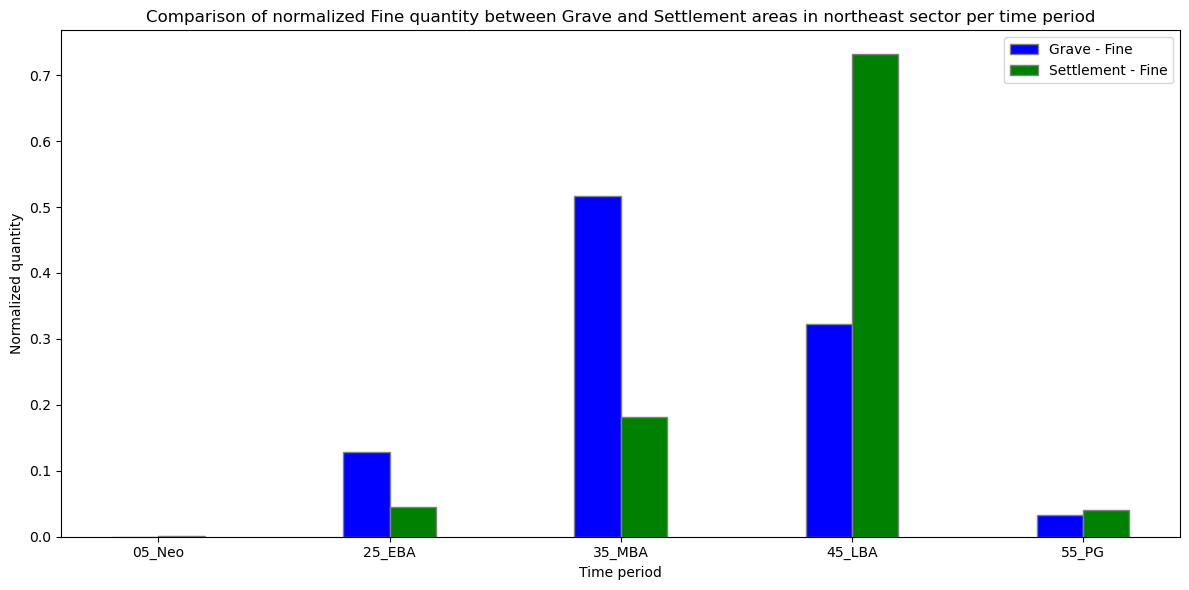

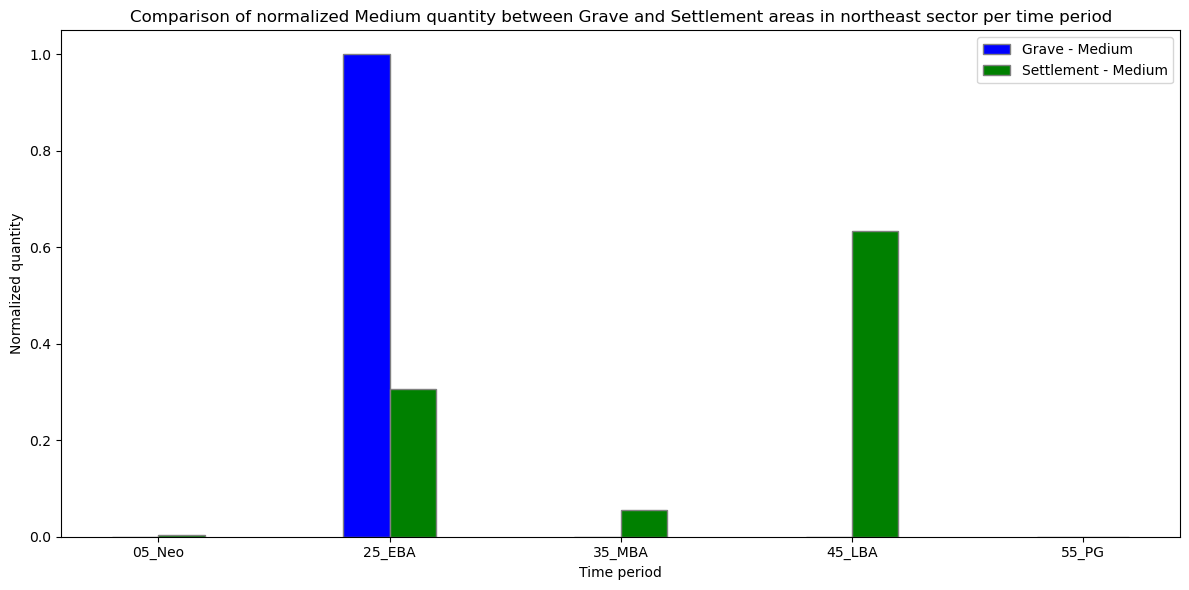

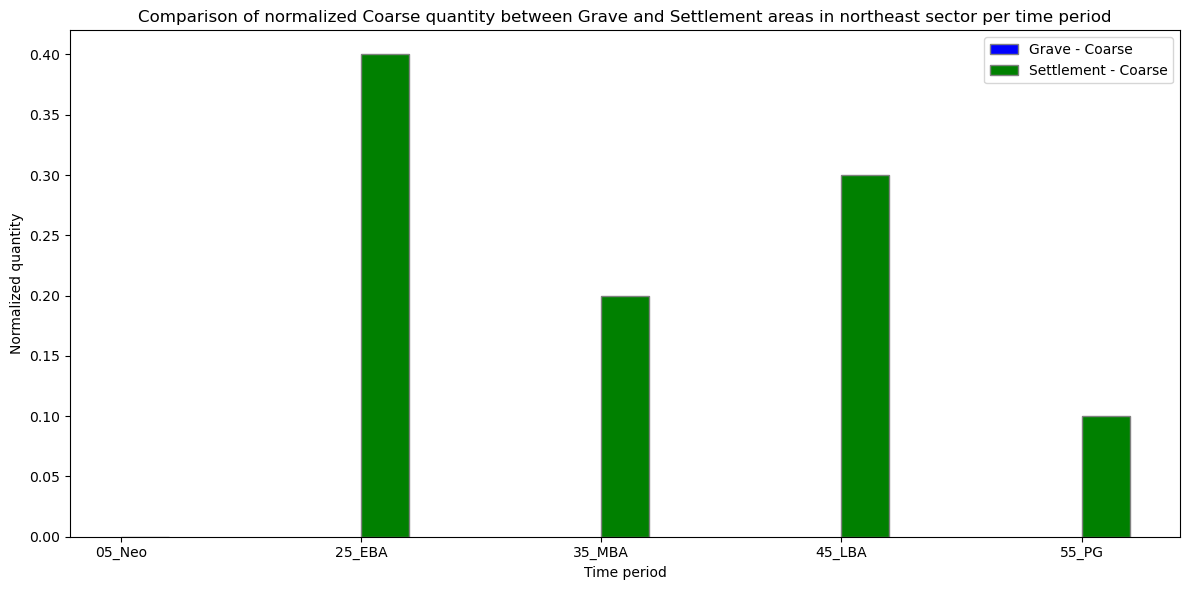

In [49]:
sum_grave_fine = Quantity_per_Chrono_grave_fine.sum(axis=0)
sum_settlement_fine = Quantity_per_Chrono_settlement_fine.sum(axis=0)

sum_grave_medium = Quantity_per_Chrono_grave_medium.sum(axis=0)
sum_settlement_medium = Quantity_per_Chrono_settlement_medium.sum(axis=0)

sum_grave_coarse = Quantity_per_Chrono_grave_coarse.sum(axis=0)
sum_settlement_coarse = Quantity_per_Chrono_settlement_coarse.sum(axis=0)

total_grave_fine = sum_grave_fine.sum()
total_settlement_fine = sum_settlement_fine.sum()

total_grave_medium = sum_grave_medium.sum()
total_settlement_medium = sum_settlement_medium.sum()

total_grave_coarse = sum_grave_coarse.sum()
total_settlement_coarse = sum_settlement_coarse.sum()

norm_grave_fine = sum_grave_fine / total_grave_fine
norm_settlement_fine = sum_settlement_fine / total_settlement_fine

norm_grave_medium = sum_grave_medium / total_grave_medium
norm_settlement_medium = sum_settlement_medium / total_settlement_medium

norm_grave_coarse = sum_grave_coarse / total_grave_coarse
norm_settlement_coarse = sum_settlement_coarse / total_settlement_coarse



bar_width = 0.2
r1 = range(len(time_period_columns))
r2 = [x + bar_width for x in r1]
r3 = [x + 2 * bar_width for x in r1]


plt.figure(figsize=(12, 6))
plt.bar(r1, norm_grave_fine, color='blue', width=bar_width, edgecolor='grey', label='Grave - Fine')
plt.bar(r2, norm_settlement_fine, color='green', width=bar_width, edgecolor='grey', label='Settlement - Fine')
plt.xlabel('Time period')
plt.ylabel('Normalized quantity')
plt.xticks([r + bar_width / 2 for r in r1], time_period_columns)
plt.title('Comparison of normalized Fine quantity between Grave and Settlement areas in northeast sector per time period')
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
plt.bar(r1, norm_grave_medium, color='blue', width=bar_width, edgecolor='grey', label='Grave - Medium')
plt.bar(r2, norm_settlement_medium, color='green', width=bar_width, edgecolor='grey', label='Settlement - Medium')
plt.xlabel('Time period')
plt.ylabel('Normalized quantity')
plt.xticks([r + bar_width / 2 for r in r1], time_period_columns)
plt.title('Comparison of normalized Medium quantity between Grave and Settlement areas in northeast sector per time period')
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
plt.bar(r1, norm_grave_coarse, color='blue', width=bar_width, edgecolor='grey', label='Grave - Coarse')
plt.bar(r2, norm_settlement_coarse, color='green', width=bar_width, edgecolor='grey', label='Settlement - Coarse')
plt.xlabel('Time period')
plt.ylabel('Normalized quantity')
plt.xticks([r + bar_width / 2 for r in r1], time_period_columns)
plt.title('Comparison of normalized Coarse quantity between Grave and Settlement areas in northeast sector per time period')
plt.legend()
plt.tight_layout()
plt.show()


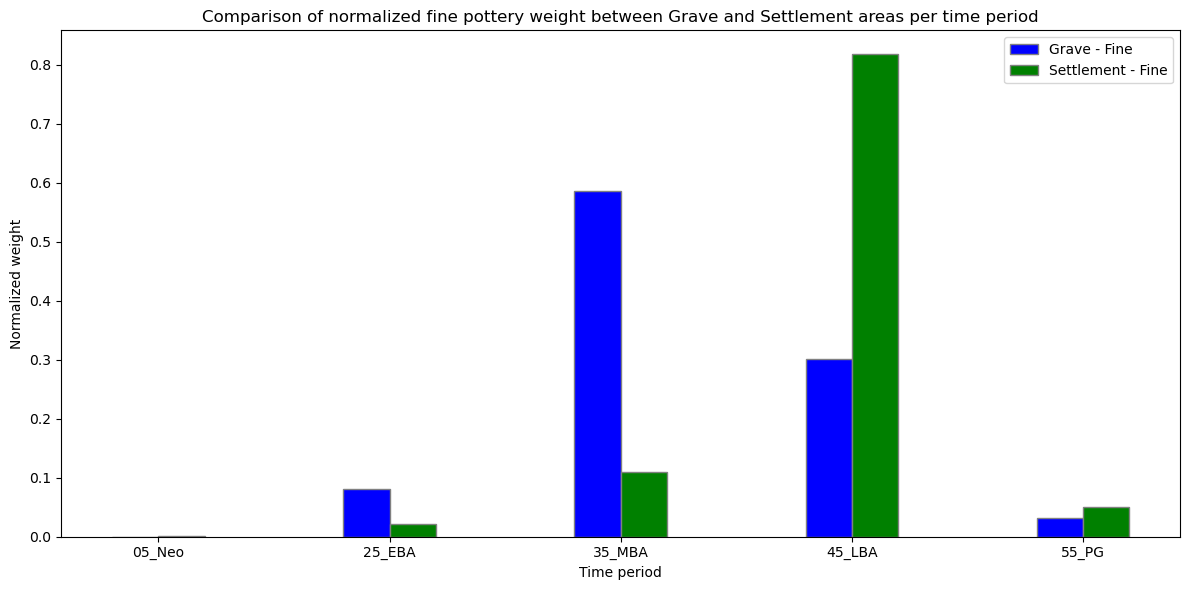

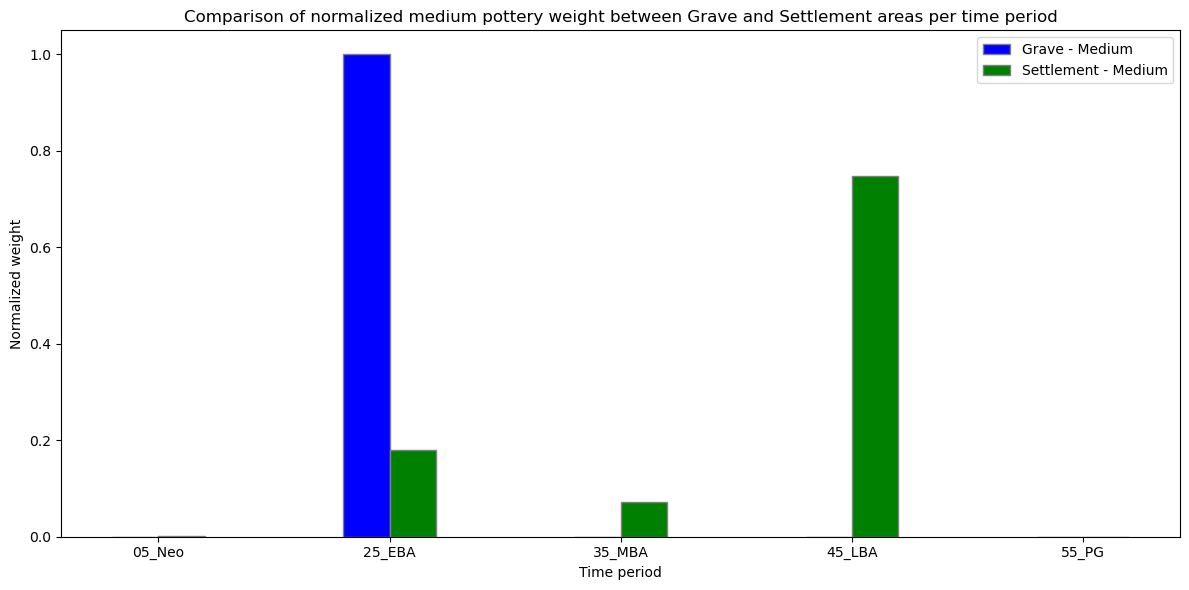

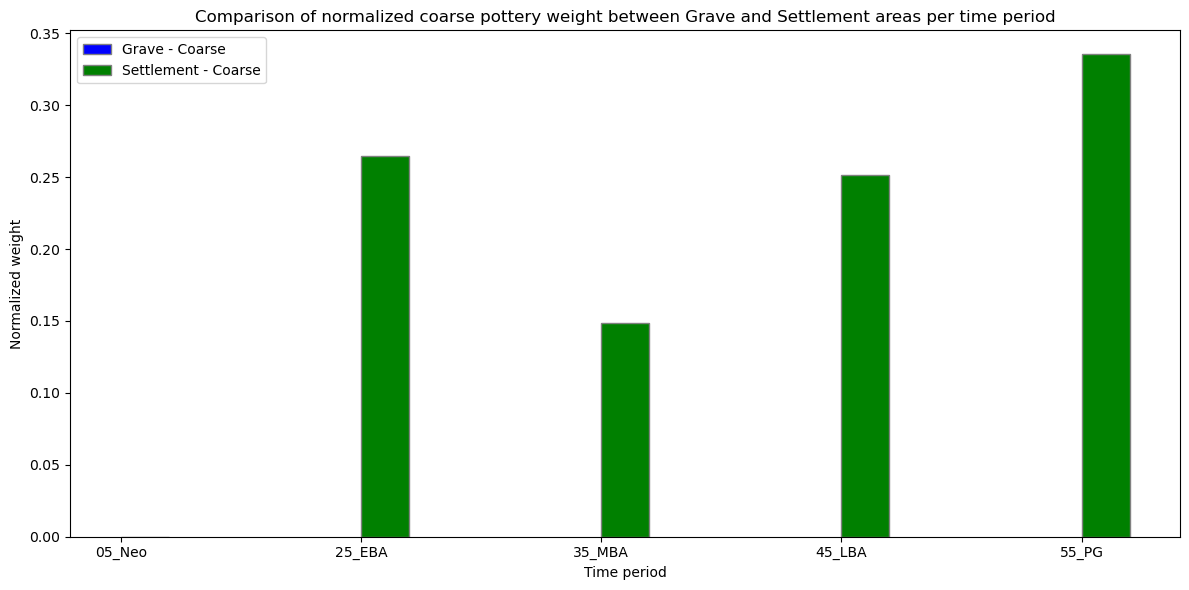

In [47]:
# Calculate sums for 'Grave' and 'Settlement' regions
sum_grave_fine_w = Weight_per_Chrono_grave_fine_w.sum(axis=0)
sum_settlement_fine_w = Weight_per_Chrono_settlement_fine_w.sum(axis=0)

sum_grave_medium_w = Weight_per_Chrono_grave_medium_w.sum(axis=0)
sum_settlement_medium_w = Weight_per_Chrono_settlement_medium_w.sum(axis=0)

sum_grave_coarse_w = Weight_per_Chrono_grave_coarse_w.sum(axis=0)
sum_settlement_coarse_w = Weight_per_Chrono_settlement_coarse_w.sum(axis=0)

# Calculate totals
total_grave_fine_w = sum_grave_fine_w.sum()
total_settlement_fine_w = sum_settlement_fine_w.sum()

total_grave_medium_w = sum_grave_medium_w.sum()
total_settlement_medium_w = sum_settlement_medium_w.sum()

total_grave_coarse_w = sum_grave_coarse_w.sum()
total_settlement_coarse_w = sum_settlement_coarse_w.sum()

# Normalize data
norm_grave_fine_w = sum_grave_fine_w / total_grave_fine_w
norm_settlement_fine_w = sum_settlement_fine_w / total_settlement_fine_w

norm_grave_medium_w = sum_grave_medium_w / total_grave_medium_w
norm_settlement_medium_w = sum_settlement_medium_w / total_settlement_medium_w

norm_grave_coarse_w = sum_grave_coarse_w / total_grave_coarse_w
norm_settlement_coarse_w = sum_settlement_coarse_w / total_settlement_coarse_w

# Plotting
bar_width = 0.2
r1 = range(len(time_period_columns))
r2 = [x + bar_width for x in r1]

# Fine Pottery
plt.figure(figsize=(12, 6))
plt.bar(r1, norm_grave_fine_w, color='blue', width=bar_width, edgecolor='grey', label='Grave - Fine')
plt.bar(r2, norm_settlement_fine_w, color='green', width=bar_width, edgecolor='grey', label='Settlement - Fine')
plt.xlabel('Time period')
plt.ylabel('Normalized weight')
plt.xticks([r + bar_width / 2 for r in r1], time_period_columns)
plt.title('Comparison of normalized fine pottery weight between Grave and Settlement areas per time period')
plt.legend()
plt.tight_layout()
plt.show()

# Medium Pottery
plt.figure(figsize=(12, 6))
plt.bar(r1, norm_grave_medium_w, color='blue', width=bar_width, edgecolor='grey', label='Grave - Medium')
plt.bar(r2, norm_settlement_medium_w, color='green', width=bar_width, edgecolor='grey', label='Settlement - Medium')
plt.xlabel('Time period')
plt.ylabel('Normalized weight')
plt.xticks([r + bar_width / 2 for r in r1], time_period_columns)
plt.title('Comparison of normalized medium pottery weight between Grave and Settlement areas per time period')
plt.legend()
plt.tight_layout()
plt.show()

# Coarse Pottery
plt.figure(figsize=(12, 6))
plt.bar(r1, norm_grave_coarse_w, color='blue', width=bar_width, edgecolor='grey', label='Grave - Coarse')
plt.bar(r2, norm_settlement_coarse_w, color='green', width=bar_width, edgecolor='grey', label='Settlement - Coarse')
plt.xlabel('Time period')
plt.ylabel('Normalized weight')
plt.xticks([r + bar_width / 2 for r in r1], time_period_columns)
plt.title('Comparison of normalized coarse pottery weight between Grave and Settlement areas per time period')
plt.legend()
plt.tight_layout()
plt.show()


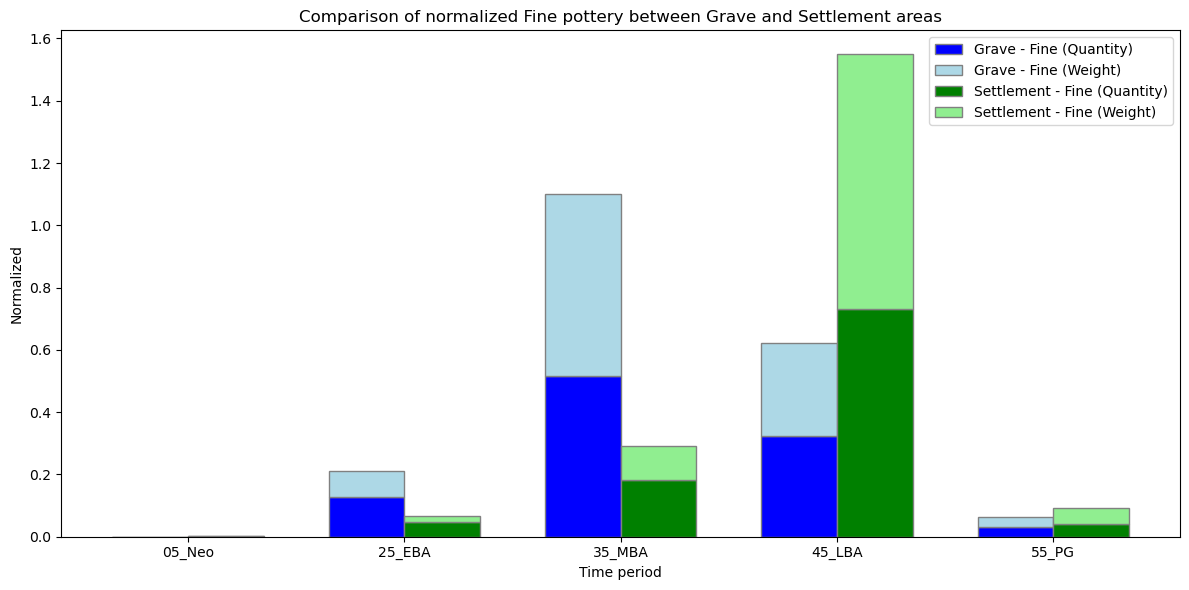

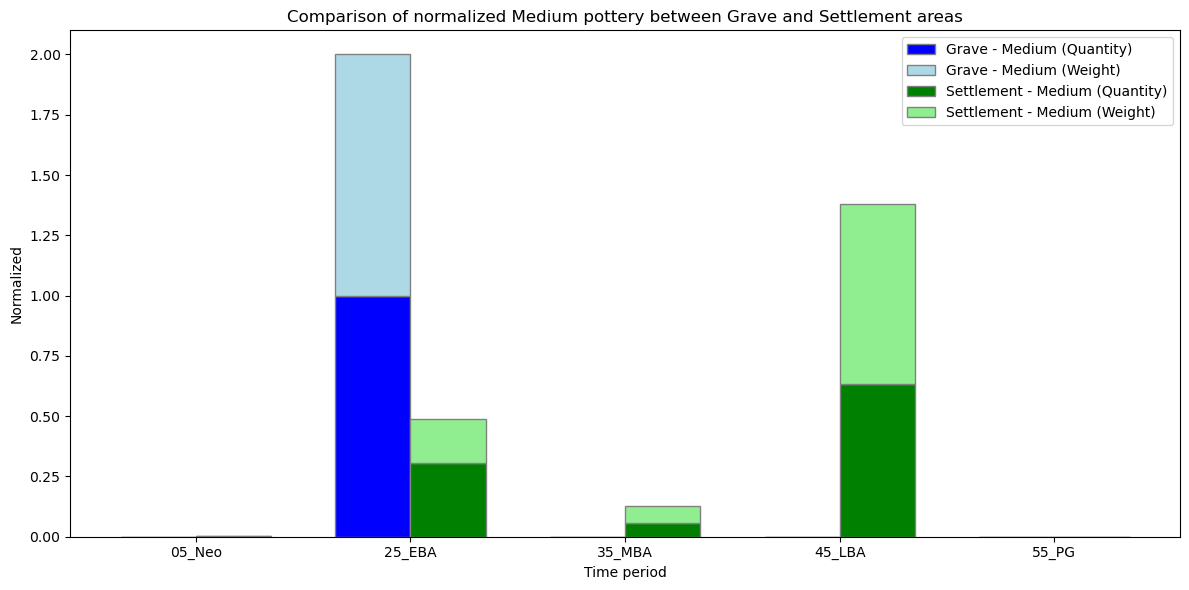

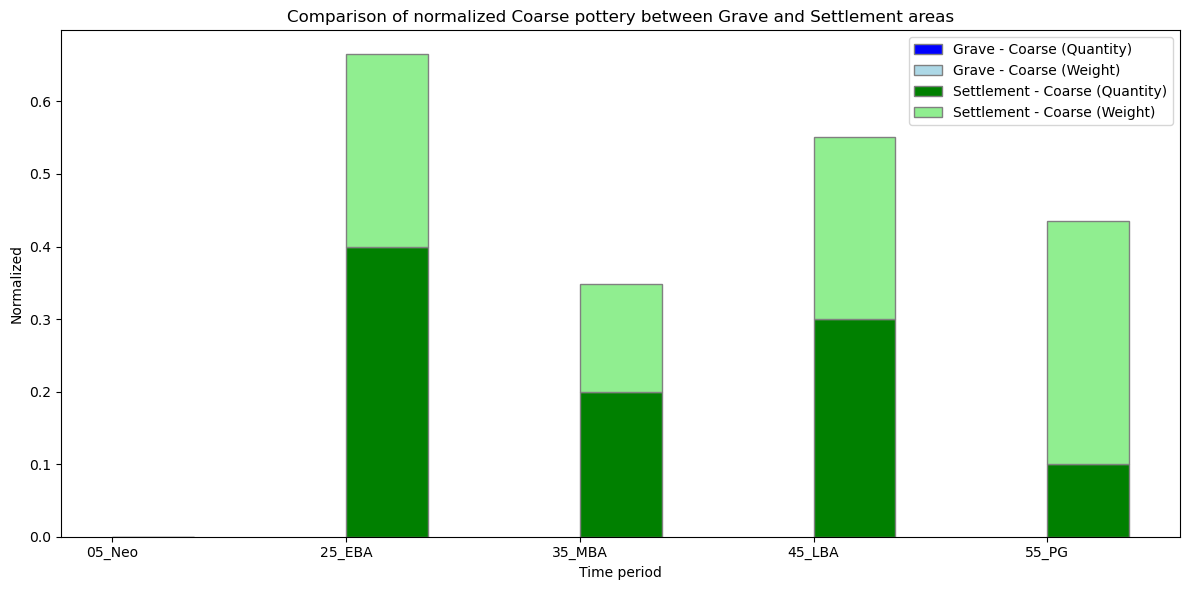

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already calculated and normalized quantity and weight data as per your previous code

# Bar width and positions
bar_width = 0.35
r1 = np.arange(len(time_period_columns))
r2 = [x + bar_width for x in r1]

# Fine Pottery
plt.figure(figsize=(12, 6))
plt.bar(r1, norm_grave_fine, color='blue', width=bar_width, edgecolor='grey', label='Grave - Fine (Quantity)')
plt.bar(r1, norm_grave_fine_w, color='lightblue', width=bar_width, edgecolor='grey', label='Grave - Fine (Weight)', bottom=norm_grave_fine)
plt.bar(r2, norm_settlement_fine, color='green', width=bar_width, edgecolor='grey', label='Settlement - Fine (Quantity)')
plt.bar(r2, norm_settlement_fine_w, color='lightgreen', width=bar_width, edgecolor='grey', label='Settlement - Fine (Weight)', bottom=norm_settlement_fine)
plt.xlabel('Time period')
plt.ylabel('Normalized')
plt.xticks([r + bar_width / 2 for r in range(len(time_period_columns))], time_period_columns)
plt.title('Comparison of normalized Fine pottery between Grave and Settlement areas')
plt.legend()
plt.tight_layout()
plt.show()

# Medium Pottery
plt.figure(figsize=(12, 6))
plt.bar(r1, norm_grave_medium, color='blue', width=bar_width, edgecolor='grey', label='Grave - Medium (Quantity)')
plt.bar(r1, norm_grave_medium_w, color='lightblue', width=bar_width, edgecolor='grey', label='Grave - Medium (Weight)', bottom=norm_grave_medium)
plt.bar(r2, norm_settlement_medium, color='green', width=bar_width, edgecolor='grey', label='Settlement - Medium (Quantity)')
plt.bar(r2, norm_settlement_medium_w, color='lightgreen', width=bar_width, edgecolor='grey', label='Settlement - Medium (Weight)', bottom=norm_settlement_medium)
plt.xlabel('Time period')
plt.ylabel('Normalized')
plt.xticks([r + bar_width / 2 for r in range(len(time_period_columns))], time_period_columns)
plt.title('Comparison of normalized Medium pottery between Grave and Settlement areas')
plt.legend()
plt.tight_layout()
plt.show()

# Coarse Pottery
plt.figure(figsize=(12, 6))
plt.bar(r1, norm_grave_coarse, color='blue', width=bar_width, edgecolor='grey', label='Grave - Coarse (Quantity)')
plt.bar(r1, norm_grave_coarse_w, color='lightblue', width=bar_width, edgecolor='grey', label='Grave - Coarse (Weight)', bottom=norm_grave_coarse)
plt.bar(r2, norm_settlement_coarse, color='green', width=bar_width, edgecolor='grey', label='Settlement - Coarse (Quantity)')
plt.bar(r2, norm_settlement_coarse_w, color='lightgreen', width=bar_width, edgecolor='grey', label='Settlement - Coarse (Weight)', bottom=norm_settlement_coarse)
plt.xlabel('Time period')
plt.ylabel('Normalized')
plt.xticks([r + bar_width / 2 for r in range(len(time_period_columns))], time_period_columns)
plt.title('Comparison of normalized Coarse pottery between Grave and Settlement areas')
plt.legend()
plt.tight_layout()
plt.show()


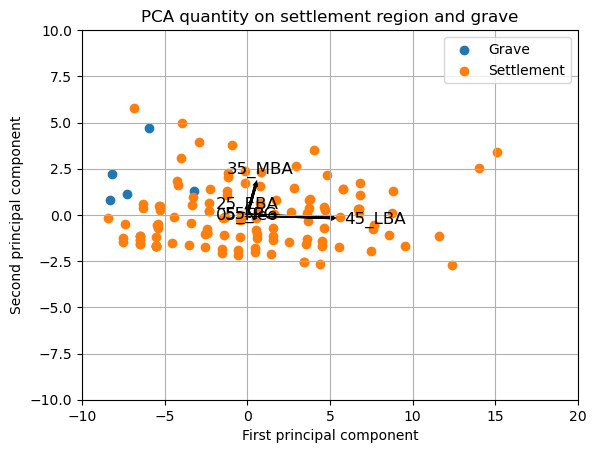

In [3]:
#PCA
pca_combined = PCA(n_components=2)
principal_components_combined = pca_combined.fit_transform(combined_data_gsq)

#transform seperate regions using combined PCA model
principal_components_q_grave = pca_combined.transform(Quantity_per_Chrono_grave)
principal_components_q_settlement = pca_combined.transform(Quantity_per_Chrono_settlement)

#principal dataframes
principal_df_q_grave = pd.DataFrame(data=principal_components_q_grave, columns=['PC1', 'PC2'])
principal_df_q_settlement = pd.DataFrame(data=principal_components_q_settlement, columns=['PC1', 'PC2'])

#function for base vectors
def plot_pca_arrows(pca, columns, ax):
    feature_vectors = pca.components_.T * np.sqrt(pca.explained_variance_)
    for i, v in enumerate(columns):
        ax.arrow(0, 0, feature_vectors[i, 0], feature_vectors[i, 1], head_width=0.1, head_length=0.1, linewidth=2, fc='black', ec='black')
        ax.text(feature_vectors[i, 0] * 1.5, feature_vectors[i, 1] * 1.5, v, color='black', ha='center', va='center', fontsize=12)

fig, ax = plt.subplots()
ax.scatter(principal_df_q_grave['PC1'], principal_df_q_grave['PC2'], label='Grave')
ax.scatter(principal_df_q_settlement['PC1'], principal_df_q_settlement['PC2'], label='Settlement')

#, alpha=0.5 for 
ax.set_title('PCA quantity on settlement region and grave')
ax.set_xlabel('First principal component')
ax.set_ylabel('Second principal component')
ax.grid(True)
ax.legend()
plot_pca_arrows(pca_combined, time_period_columns, ax)

ax.set_xlim(-10, 20)  
ax.set_ylim(-10, 10)  
plt.show()


In [4]:


explained_variance_ratio = pca_combined.explained_variance_ratio_
print("Explained variance ratio:", explained_variance_ratio)



Explained variance ratio: [0.84516277 0.08920942]


In [38]:
from scipy.stats import pearsonr

# Compute Pearson correlation coefficient and p-value
corr, p_value = pearsonr(combined_data_gsq_fine.sum(axis=1), combined_data_gsq_medium.sum(axis=1))
print(f"Pearson correlation coefficient (Fine vs. Medium): {corr}, p-value: {p_value}")


Pearson correlation coefficient (Fine vs. Medium): 0.22789545617891338, p-value: 0.009676278491427699


In [39]:
# Compute correlation matrix
correlation_matrix = combined_data_gsq_fine.corr()

# Display correlation matrix
print(correlation_matrix)


          05_Neo    25_EBA    35_MBA    45_LBA     55_PG
05_Neo  1.000000  0.066717  0.010449 -0.037359 -0.051232
25_EBA  0.066717  1.000000  0.189927  0.087995 -0.028939
35_MBA  0.010449  0.189927  1.000000  0.307771  0.075240
45_LBA -0.037359  0.087995  0.307771  1.000000  0.196473
55_PG  -0.051232 -0.028939  0.075240  0.196473  1.000000


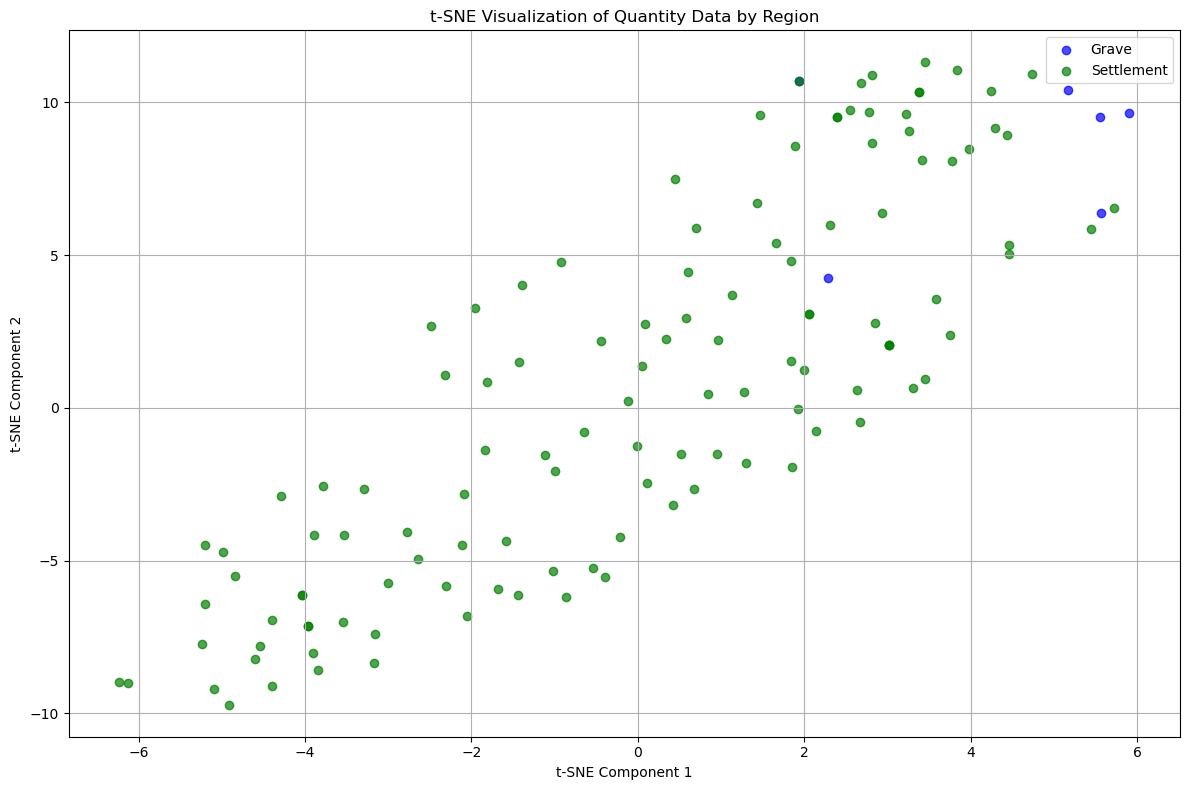

In [8]:
tsne = TSNE(n_components=2, random_state=42)
data_tsne_q = tsne.fit_transform(combined_data_gsq)

combined_regions = pd.concat([
    pd.Series(['Grave'] * Quantity_per_Chrono_grave.shape[0]),
    pd.Series(['Settlement'] * Quantity_per_Chrono_settlement.shape[0])
])

plt.figure(figsize=(12, 8))
colors = {'Grave': 'blue', 'Settlement': 'green'}

for region in colors.keys():
    mask = (combined_regions == region)
    plt.scatter(data_tsne_q[mask, 0], data_tsne_q[mask, 1], color=colors[region], label=region, alpha=0.7)

plt.title('t-SNE Visualization of Quantity Data by Region')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()